<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Traitement_pytorch_etu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données et Tenseurs avec pytorch 
Les tenseurs sont une structure de données spécialisée qui ressemble beaucoup aux tableaux et aux matrices. Dans PyTorch, nous utilisons les tenseurs pour coder les entrées et les sorties d'un modèle, ainsi que les paramètres du modèle.

In [ ]:
import torch
import numpy as np

## Définir un tenseur

In [ ]:
data = [[1, 2],[3, 4]]
x_data = #

Il est possible de le définir selon un matrice numpy

In [ ]:
np_array = np.array(data)
x_np = #

En cas de redéfinition d'un tenseur,celui-ci conserve les propriétés (forme, type de données) du tenseur en argument, sauf s'il est explicitement surchargé.

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Shape (canal) permet de donner une même informations de dimensions pour la définition de torseur

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

## Attributs d'un Tenseur

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Nos notons que notre tenseur est stocké sur CPU, or pour avoir de meilleure performance nous souhaitons le passer en GPU (si disponible)


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cpu


En utilisant les connaissance que vous avez sur les array donner en output : 
* La première ligne du tenseur
* La première colonne du tenseur
* La dernière colonne du tenseur


In [ ]:
tensor = torch.ones(4, 4)

In [ ]:
#

Il est possible d'assembler les tenseurs en les concatenant 

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


## Tenseur avec numpy

Il est possible de fusionner dans la mémoire les tenseur stocké sur le CPU et une array numpy. Ce qui facilite grandement l'efficacité des opérations sur celles-ci

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
#
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


Array dans un tenseur

In [ ]:
n = np.ones(5)
t = #(n)

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Normalisation et standadisation avec **Pytorch**

La normalisation c’est le fait de modifier les données de chaque canal/tenseur de telle sorte que la moyenne soit nulle et l’écart-type égale à un.

La normalisation est un passage indispensable dans le machine learning car il condiionne le bon apprentissage par le modèle. 

La normalisation de données necessite de calculer l'écart-type et la moyenne de notre jeu de donées. 

In [ ]:
import numpy as np

x = [79, 9, 37, 14, 23, 4]

A vous de jouer : 
* Calculer l'écart-type et la moyenne de cette array

In [ ]:
#

Cet Ecart-type et cette moyenne vont nous servir por la normalisation de la matrice. 

La normalisation s'exprime selon la formule suivante : 

$Xnorm = (x-\bar x)/std$

A vous de jouer : 
* Appliquer la formule de l'écart-type sur la matrice

In [ ]:
#

La matrice est maintenant normalisée 

* Pour le verifier il est possible de calculer sa moyenne et son ecart-type 
Que remarquez-vous 

In [ ]:
#

Pourquoi normaliser les données ? 

* Le fait de normaliser nos données les inclues toutes dans la même plage que nos fonctions d’activation, généralement entre 0 et 1. Cela permet d’avoir moins souvent des gradients non nuls lors de l’entraînement et, par conséquent, les neurones de notre réseau apprendront plus rapidement.
* En normalisant chaque canal de manière à ce qu’ils aient la même distribution, on s’assure que les informations du canal peuvent être mélangées et mises à jour lors de la descente de gradient (back propagation) en utilisant un même learning rate (taux d’apprentissage).


Pytorch permet, à l'instar de plusieurs bibliothèque de calculs scientifiques de calculer directement la normalisation. Prenons un exemple sur une image extraite d'un dataset spécifique

In [ ]:
from torchvision import datasets
from torchvision import transforms

data_path = '../data-unversioned/p1ch7/'

cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.ToTensor()
    )

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/


Concernant les parametres : 
* data_path, le répertoire sera enregistré le jeu de données cifar-10 
* train = True, crée le jeu de données à partir de l’ensemble d’entraînement, si False crée à partir de l’ensemble de test.
* download = True, télécharge l’ensemble de données depuis internet et le place dans le répertoire racine. Si le jeu de données est déjà téléchargé, il n’est pas téléchargé à nouveau.
* transform = transforms.ToTensor(), permet d’initiliaser les images directement sous forme de Tenseur PyTorch (si rien n’est spécifié les images sont au format PIL.Image)

A vous de jouer :
* Récuperer la 6ème image du jeu de données et afficher la

In [ ]:
img_t, index_label = cifar10[5]
type(img_t), type(index_label)

(torch.Tensor, int)

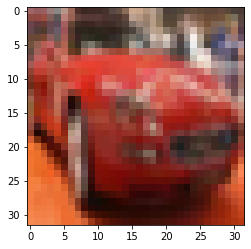

In [ ]:
import matplotlib.pyplot as plt

#

On va créer le canal de tenseur dont nous parlions dans la partie précédente.

Pour cela, on utilise la fonction stack() en indiquant chacun des tenseurs de notre variable cifar10 :

In [ ]:
import torch

#
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

A vous de jouer : 
* De manière analogue calculer l'écart_type 

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
imgs_norm = transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

A vous de jouer: 
* Normaliser l'ensemble des images en une boucle
* Verifier si la normalisation est correcte pour l'ensemble de la série 

In [ ]:
#

In [ ]:
#

Il est possible de normaliser directement le dataset dans le dataloader

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        t#
        ]))
#

A vous de jouer : 
* Afficher graphiquement le dataset normalisé. Que constatez vous ? 
* A vous de dénormaliser les données pour revenir l'état inital 

In [ ]:
#

In [ ]:
#

Pour revenir a l'état initial, il suffit de suivre la formule suivante : 
* $mean=-\bar x/std$
* $std=1/std$

In [ ]:
plt.imshow(unorm(img).permute(1, 2, 0))
plt.show()